载入数据

In [1]:
import json

# 打开JSON文件并加载数据
with open('p1560L.json', 'r') as file:
    data = json.load(file)

# 提取 "label" 字段到一个列表
label = data["label"]

for line in label :
    print(line)


[1, 0.26944444444444443, 0.8147058823529412, 0.36944444444444446, 0.7911764705882353, 0.4527777777777778, 0.7514705882352941, 0.5111111111111111, 0.7073529411764706, 0.5888888888888889, 0.7014705882352941, 0.4666666666666667, 0.5676470588235294, 0.5166666666666667, 0.475, 0.5305555555555556, 0.4073529411764706, 0.5388888888888889, 0.34705882352941175, 0.3888888888888889, 0.5441176470588235, 0.4388888888888889, 0.43676470588235294, 0.46111111111111114, 0.36176470588235293, 0.4777777777777778, 0.2926470588235294, 0.3055555555555556, 0.55, 0.31666666666666665, 0.4426470588235294, 0.31666666666666665, 0.375, 0.31666666666666665, 0.31323529411764706, 0.21944444444444444, 0.5735294117647058, 0.18888888888888888, 0.49264705882352944, 0.16666666666666666, 0.43823529411764706, 0.15, 0.38823529411764707]
[0, 0.26944444444444443, 0.8264705882352941, 0.3888888888888889, 0.7970588235294118, 0.49166666666666664, 0.7411764705882353, 0.5472222222222223, 0.6838235294117647, 0.6027777777777777, 0.638235

In [2]:
print(len(label))

249


哈希定义

In [3]:
#以下的数字代表是这个点的x坐标序号，+1 为y坐标序号 
# 0-21   index = 2 * num + 1
WRIST = 1 # 腕部关键点  
THUMB_TIP = 9 #大拇指顶点
INDEX_FINGER_TIP = 17 #食指顶点
MIDDLE_FINGER_TIP = 25 #中指顶点
RING_FINGER_TIP = 33 #无名指顶点
PINKY_TIP = 41#小指顶点

'''
WT  大拇指 ——> 腕部
WI  食指
WM  中指
WR  无名指
WP  小指
'''

WT=[]
WI = []
WM = []
WR = []
WP = []

计算局部最大值和最小值

In [4]:
def find_local_extremes(numbers):
    if len(numbers) < 3:
        return "输入的数字串过短，无法找到局部最大值和最小值"

    extremes = []
    transitions = []  # 记录时间变化点

    for i in range(1, len(numbers) - 1):
        if numbers[i] >= numbers[i - 1] and numbers[i] >= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最高点"))
        elif numbers[i] <= numbers[i - 1] and numbers[i] <= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最低点"))
        elif numbers[i - 1] == numbers[i + 1]:
            print("重复")
    
    if len(extremes) == 0:
        return "没有找到局部最大值和最小值"

    # 记录时间变化点
    for i in range(1, len(extremes)):
        if extremes[i][2] == "最高点" and extremes[i-1][2] == "最低点":
            transitions.append((extremes[i-1][0], extremes[i][0], "升为最高点", ))
        elif extremes[i][2] == "最低点" and extremes[i-1][2] == "最高点":
            transitions.append((extremes[i-1][0], extremes[i][0], "降为最低点"))

    return extremes, transitions



计算抓伸周期

In [5]:
def calculate_transition_times(transitions):
    high_to_low_times = []
    low_to_high_times = []

    for i in range(1, len(transitions)):
        if transitions[i][2] == "降为最低点" :
            high_to_low_time = transitions[i][1] - transitions[i][0]
            high_to_low_times.append(high_to_low_time)
        elif transitions[i][2] == "升为最高点" :
            low_to_high_time = transitions[i][1] - transitions[i][0]
            low_to_high_times.append(low_to_high_time)

    return high_to_low_times, low_to_high_times

### 大拇指顶点到腕部关键点距离

In [6]:
import math

for line in label :
    x1 = line[1]
    y1 = line[2] #腕部
    x2 = line[9]
    y2 = line[10] #大拇指
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    WT.append(distance)

#print(min_distance)
#print(max_distance)
#print(len(label))
print(WT)
print(len(WT))
print(max(WT))
print(min(WT))
print("********************************")


[0.33892032237729536, 0.38281018411566353, 0.40276037693258576, 0.40236393115450736, 0.3932720051694256, 0.34810276660576384, 0.3374325433383273, 0.3210129404844569, 0.31926386083092956, 0.32030628604216266, 0.32969066449636597, 0.33082259607256953, 0.35948681656571035, 0.3714501912289945, 0.3594061501533893, 0.32904687391079546, 0.3587346015261066, 0.40274731751875215, 0.4054846137780879, 0.4074604175140758, 0.37264478903209164, 0.33483577841211737, 0.3334378440545567, 0.33284991538399217, 0.3342263844277917, 0.3269736861048839, 0.35103428372422546, 0.35198403410260903, 0.32756645616277863, 0.30910135512857484, 0.3561651498878258, 0.39006851354101635, 0.3777161802123712, 0.3249465562645823, 0.31716296593481835, 0.312027334880849, 0.30974126183024336, 0.31851032705714927, 0.30931441602801085, 0.2960175563961245, 0.31502632339748626, 0.3020987309752674, 0.310813349571097, 0.34294987881199585, 0.3745803039644159, 0.38165727032169294, 0.38703331958011794, 0.36112552835502787, 0.3225332918

In [7]:
extremes, transitions = find_local_extremes(WT)

high_to_low_times, low_to_high_times = calculate_transition_times(transitions)

for idx, extreme in enumerate(extremes):
    index, value, extreme_type = extreme
    print(f"序号: {index}, 数值: {value}, 类型: {extreme_type}")


序号: 2, 数值: 0.40276037693258576, 类型: 最高点
序号: 8, 数值: 0.31926386083092956, 类型: 最低点
序号: 13, 数值: 0.3714501912289945, 类型: 最高点
序号: 15, 数值: 0.32904687391079546, 类型: 最低点
序号: 19, 数值: 0.4074604175140758, 类型: 最高点
序号: 23, 数值: 0.33284991538399217, 类型: 最低点
序号: 24, 数值: 0.3342263844277917, 类型: 最高点
序号: 25, 数值: 0.3269736861048839, 类型: 最低点
序号: 27, 数值: 0.35198403410260903, 类型: 最高点
序号: 29, 数值: 0.30910135512857484, 类型: 最低点
序号: 31, 数值: 0.39006851354101635, 类型: 最高点
序号: 36, 数值: 0.30974126183024336, 类型: 最低点
序号: 37, 数值: 0.31851032705714927, 类型: 最高点
序号: 39, 数值: 0.2960175563961245, 类型: 最低点
序号: 40, 数值: 0.31502632339748626, 类型: 最高点
序号: 41, 数值: 0.3020987309752674, 类型: 最低点
序号: 46, 数值: 0.38703331958011794, 类型: 最高点
序号: 50, 数值: 0.31358184517846155, 类型: 最低点
序号: 52, 数值: 0.3162463822995769, 类型: 最高点
序号: 54, 数值: 0.3023496668269587, 类型: 最低点
序号: 55, 数值: 0.3143254492721641, 类型: 最高点
序号: 57, 数值: 0.29302032956354457, 类型: 最低点
序号: 62, 数值: 0.3705963402993762, 类型: 最高点
序号: 65, 数值: 0.31508530531621454, 类型: 最低点
序号: 70, 数值: 0.35747429285192

In [8]:
print(extremes)

[(2, 0.40276037693258576, '最高点'), (8, 0.31926386083092956, '最低点'), (13, 0.3714501912289945, '最高点'), (15, 0.32904687391079546, '最低点'), (19, 0.4074604175140758, '最高点'), (23, 0.33284991538399217, '最低点'), (24, 0.3342263844277917, '最高点'), (25, 0.3269736861048839, '最低点'), (27, 0.35198403410260903, '最高点'), (29, 0.30910135512857484, '最低点'), (31, 0.39006851354101635, '最高点'), (36, 0.30974126183024336, '最低点'), (37, 0.31851032705714927, '最高点'), (39, 0.2960175563961245, '最低点'), (40, 0.31502632339748626, '最高点'), (41, 0.3020987309752674, '最低点'), (46, 0.38703331958011794, '最高点'), (50, 0.31358184517846155, '最低点'), (52, 0.3162463822995769, '最高点'), (54, 0.3023496668269587, '最低点'), (55, 0.3143254492721641, '最高点'), (57, 0.29302032956354457, '最低点'), (62, 0.3705963402993762, '最高点'), (65, 0.31508530531621454, '最低点'), (70, 0.3574742928519207, '最高点'), (73, 0.29425160348157864, '最低点'), (82, 0.46168458962975295, '最高点'), (86, 0.3789104004193954, '最低点'), (87, 0.38005847503304596, '最高点'), (88, 0.37098067427571063, '

In [9]:
print(len(transitions))

78


In [10]:
print(transitions)

[(2, 8, '降为最低点'), (8, 13, '升为最高点'), (13, 15, '降为最低点'), (15, 19, '升为最高点'), (19, 23, '降为最低点'), (23, 24, '升为最高点'), (24, 25, '降为最低点'), (25, 27, '升为最高点'), (27, 29, '降为最低点'), (29, 31, '升为最高点'), (31, 36, '降为最低点'), (36, 37, '升为最高点'), (37, 39, '降为最低点'), (39, 40, '升为最高点'), (40, 41, '降为最低点'), (41, 46, '升为最高点'), (46, 50, '降为最低点'), (50, 52, '升为最高点'), (52, 54, '降为最低点'), (54, 55, '升为最高点'), (55, 57, '降为最低点'), (57, 62, '升为最高点'), (62, 65, '降为最低点'), (65, 70, '升为最高点'), (70, 73, '降为最低点'), (73, 82, '升为最高点'), (82, 86, '降为最低点'), (86, 87, '升为最高点'), (87, 88, '降为最低点'), (88, 91, '升为最高点'), (91, 94, '降为最低点'), (94, 103, '升为最高点'), (103, 106, '降为最低点'), (106, 111, '升为最高点'), (111, 112, '降为最低点'), (112, 113, '升为最高点'), (113, 114, '降为最低点'), (114, 115, '升为最高点'), (115, 117, '降为最低点'), (117, 121, '升为最高点'), (121, 122, '降为最低点'), (122, 124, '升为最高点'), (124, 127, '降为最低点'), (127, 129, '升为最高点'), (129, 130, '降为最低点'), (131, 136, '升为最高点'), (136, 137, '降为最低点'), (137, 138, '升为最高点'), (138, 140, '降为最低点'), (140, 145, '升为最高点'), (145, 152, '降为最

In [11]:
cycle = 0
for idx, transition in enumerate(transitions):
    start_index, end_index, transition_type = transition
    print(f"从{start_index}秒到{end_index}秒，类型: {transition_type}")

从2秒到8秒，类型: 降为最低点
从8秒到13秒，类型: 升为最高点
从13秒到15秒，类型: 降为最低点
从15秒到19秒，类型: 升为最高点
从19秒到23秒，类型: 降为最低点
从23秒到24秒，类型: 升为最高点
从24秒到25秒，类型: 降为最低点
从25秒到27秒，类型: 升为最高点
从27秒到29秒，类型: 降为最低点
从29秒到31秒，类型: 升为最高点
从31秒到36秒，类型: 降为最低点
从36秒到37秒，类型: 升为最高点
从37秒到39秒，类型: 降为最低点
从39秒到40秒，类型: 升为最高点
从40秒到41秒，类型: 降为最低点
从41秒到46秒，类型: 升为最高点
从46秒到50秒，类型: 降为最低点
从50秒到52秒，类型: 升为最高点
从52秒到54秒，类型: 降为最低点
从54秒到55秒，类型: 升为最高点
从55秒到57秒，类型: 降为最低点
从57秒到62秒，类型: 升为最高点
从62秒到65秒，类型: 降为最低点
从65秒到70秒，类型: 升为最高点
从70秒到73秒，类型: 降为最低点
从73秒到82秒，类型: 升为最高点
从82秒到86秒，类型: 降为最低点
从86秒到87秒，类型: 升为最高点
从87秒到88秒，类型: 降为最低点
从88秒到91秒，类型: 升为最高点
从91秒到94秒，类型: 降为最低点
从94秒到103秒，类型: 升为最高点
从103秒到106秒，类型: 降为最低点
从106秒到111秒，类型: 升为最高点
从111秒到112秒，类型: 降为最低点
从112秒到113秒，类型: 升为最高点
从113秒到114秒，类型: 降为最低点
从114秒到115秒，类型: 升为最高点
从115秒到117秒，类型: 降为最低点
从117秒到121秒，类型: 升为最高点
从121秒到122秒，类型: 降为最低点
从122秒到124秒，类型: 升为最高点
从124秒到127秒，类型: 降为最低点
从127秒到129秒，类型: 升为最高点
从129秒到130秒，类型: 降为最低点
从131秒到136秒，类型: 升为最高点
从136秒到137秒，类型: 降为最低点
从137秒到138秒，类型: 升为最高点
从138秒到140秒，类型: 降为最低点
从140秒到145秒，类型: 升为最高点
从145秒到152秒，类型: 降

In [12]:
if high_to_low_times:
    print(f"从最高点降为最低点的时间：")
    print(f"最大时间: {max(high_to_low_times)}帧")
    print(f"最小时间: {min(high_to_low_times)}帧")
    print(f"平均时间: {sum(high_to_low_times) / len(high_to_low_times)}秒")

if low_to_high_times:
    print(f"从最低点升为最高点的时间：")
    print(f"最大时间: {max(low_to_high_times)}帧")
    print(f"最小时间: {min(low_to_high_times)}帧")
    print(f"平均时间: {sum(low_to_high_times) / len(low_to_high_times)}秒")

从最高点降为最低点的时间：
最大时间: 7帧
最小时间: 1帧
平均时间: 2.5526315789473686秒
从最低点升为最高点的时间：
最大时间: 9帧
最小时间: 1帧
平均时间: 3.5384615384615383秒


### 食指顶点到腕部关键点距离

In [13]:
import math

for line in label :
    x1 = line[1]
    y1 = line[2] #腕部
    x2 = line[17]
    y2 = line[18] #食指
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    WI.append(distance)

#print(min_distance)
#print(max_distance)
#print(len(label))
print(WI)
print(len(WI))
print(max(WI))
print(min(WI))

[0.5397166666578612, 0.40478711042645255, 0.29313183555296835, 0.2494231137200879, 0.24678720761110914, 0.2640447039938628, 0.26376238899240717, 0.26286304785957826, 0.26286304785957826, 0.26649089506949464, 0.2659380866194594, 0.269959416245763, 0.3305946461593172, 0.4215724590695813, 0.4731161676716032, 0.4967957690439263, 0.4596194077712559, 0.32190363613825934, 0.261529038447388, 0.25789770126046924, 0.27113692947509505, 0.27759124840644617, 0.2732770718190108, 0.2780041849327169, 0.2739814593389758, 0.27576108569765784, 0.2796993322012947, 0.39026538671306643, 0.4765495353156394, 0.4798726682962656, 0.33665159215740326, 0.27061137258599033, 0.272711243472291, 0.2858964473186601, 0.2778378443322214, 0.2778378443322214, 0.2757610856976579, 0.268642210128394, 0.30546576045922913, 0.3901832827627935, 0.4423831536929049, 0.47201269748424746, 0.47428493677048555, 0.45176272485797797, 0.38057944370872504, 0.2675909906398287, 0.2696635414837096, 0.27061137258599033, 0.2776920763604112, 0.

In [14]:
index_finger_extremes, index_finger_transitions = find_local_extremes(WI)

index_finger_high_to_low_times, index_finger_low_to_high_times = calculate_transition_times(index_finger_transitions)

for idx, extreme in enumerate(index_finger_extremes):
    index, value, extreme_type = extreme
    print(f"序号: {index}, 数值: {value}, 类型: {extreme_type}")


序号: 4, 数值: 0.24678720761110914, 类型: 最低点
序号: 5, 数值: 0.2640447039938628, 类型: 最高点
序号: 7, 数值: 0.26286304785957826, 类型: 最低点
序号: 8, 数值: 0.26286304785957826, 类型: 最低点
序号: 9, 数值: 0.26649089506949464, 类型: 最高点
序号: 10, 数值: 0.2659380866194594, 类型: 最低点
序号: 15, 数值: 0.4967957690439263, 类型: 最高点
序号: 19, 数值: 0.25789770126046924, 类型: 最低点
序号: 21, 数值: 0.27759124840644617, 类型: 最高点
序号: 22, 数值: 0.2732770718190108, 类型: 最低点
序号: 23, 数值: 0.2780041849327169, 类型: 最高点
序号: 24, 数值: 0.2739814593389758, 类型: 最低点
序号: 29, 数值: 0.4798726682962656, 类型: 最高点
序号: 31, 数值: 0.27061137258599033, 类型: 最低点
序号: 33, 数值: 0.2858964473186601, 类型: 最高点
序号: 34, 数值: 0.2778378443322214, 类型: 最低点
序号: 35, 数值: 0.2778378443322214, 类型: 最高点
序号: 37, 数值: 0.268642210128394, 类型: 最低点
序号: 42, 数值: 0.47428493677048555, 类型: 最高点
序号: 45, 数值: 0.2675909906398287, 类型: 最低点
序号: 49, 数值: 0.2799267604213034, 类型: 最高点
序号: 53, 数值: 0.2708517551084596, 类型: 最低点
序号: 57, 数值: 0.4505989968680243, 类型: 最高点
序号: 62, 数值: 0.2400413556185555, 类型: 最低点
序号: 64, 数值: 0.26459955098276544, 类型: 最

In [15]:
for i, (thumb_val, index_val) in enumerate(zip(WT, WI)):
    print(f"第{i}帧, WT[{i}]: {thumb_val}, WI[{i}]: {index_val}")


第0帧, WT[0]: 0.33892032237729536, WI[0]: 0.5397166666578612
第1帧, WT[1]: 0.38281018411566353, WI[1]: 0.40478711042645255
第2帧, WT[2]: 0.40276037693258576, WI[2]: 0.29313183555296835
第3帧, WT[3]: 0.40236393115450736, WI[3]: 0.2494231137200879
第4帧, WT[4]: 0.3932720051694256, WI[4]: 0.24678720761110914
第5帧, WT[5]: 0.34810276660576384, WI[5]: 0.2640447039938628
第6帧, WT[6]: 0.3374325433383273, WI[6]: 0.26376238899240717
第7帧, WT[7]: 0.3210129404844569, WI[7]: 0.26286304785957826
第8帧, WT[8]: 0.31926386083092956, WI[8]: 0.26286304785957826
第9帧, WT[9]: 0.32030628604216266, WI[9]: 0.26649089506949464
第10帧, WT[10]: 0.32969066449636597, WI[10]: 0.2659380866194594
第11帧, WT[11]: 0.33082259607256953, WI[11]: 0.269959416245763
第12帧, WT[12]: 0.35948681656571035, WI[12]: 0.3305946461593172
第13帧, WT[13]: 0.3714501912289945, WI[13]: 0.4215724590695813
第14帧, WT[14]: 0.3594061501533893, WI[14]: 0.4731161676716032
第15帧, WT[15]: 0.32904687391079546, WI[15]: 0.4967957690439263
第16帧, WT[16]: 0.3587346015261066, WI[

In [16]:
# 食指伸抓距离的变化情况
for idx, transition in enumerate(index_finger_transitions):
    start_index, end_index, transition_type = transition
    print(f"从{start_index}秒到{end_index}秒，类型: {transition_type}")

从4秒到5秒，类型: 升为最高点
从5秒到7秒，类型: 降为最低点
从8秒到9秒，类型: 升为最高点
从9秒到10秒，类型: 降为最低点
从10秒到15秒，类型: 升为最高点
从15秒到19秒，类型: 降为最低点
从19秒到21秒，类型: 升为最高点
从21秒到22秒，类型: 降为最低点
从22秒到23秒，类型: 升为最高点
从23秒到24秒，类型: 降为最低点
从24秒到29秒，类型: 升为最高点
从29秒到31秒，类型: 降为最低点
从31秒到33秒，类型: 升为最高点
从33秒到34秒，类型: 降为最低点
从34秒到35秒，类型: 升为最高点
从35秒到37秒，类型: 降为最低点
从37秒到42秒，类型: 升为最高点
从42秒到45秒，类型: 降为最低点
从45秒到49秒，类型: 升为最高点
从49秒到53秒，类型: 降为最低点
从53秒到57秒，类型: 升为最高点
从57秒到62秒，类型: 降为最低点
从62秒到64秒，类型: 升为最高点
从64秒到65秒，类型: 降为最低点
从65秒到66秒，类型: 升为最高点
从66秒到67秒，类型: 降为最低点
从67秒到68秒，类型: 升为最高点
从68秒到69秒，类型: 降为最低点
从69秒到77秒，类型: 升为最高点
从77秒到83秒，类型: 降为最低点
从83秒到87秒，类型: 升为最高点
从87秒到88秒，类型: 降为最低点
从88秒到89秒，类型: 升为最高点
从89秒到91秒，类型: 降为最低点
从91秒到98秒，类型: 升为最高点
从98秒到105秒，类型: 降为最低点
从105秒到111秒，类型: 升为最高点
从111秒到112秒，类型: 降为最低点
从112秒到113秒，类型: 升为最高点
从113秒到114秒，类型: 降为最低点
从114秒到119秒，类型: 升为最高点
从119秒到126秒，类型: 降为最低点
从126秒到130秒，类型: 升为最高点
从130秒到131秒，类型: 降为最低点
从131秒到143秒，类型: 升为最高点
从143秒到147秒，类型: 降为最低点
从147秒到148秒，类型: 升为最高点
从148秒到149秒，类型: 降为最低点
从149秒到153秒，类型: 升为最高点
从153秒到156秒，类型: 降为最低点
从156秒到166秒，类型: 升为最高点
从166秒到1

In [17]:
print(len(index_finger_transitions))

73


In [18]:
if index_finger_high_to_low_times:
    print(f"从最高点降为最低点的时间：")
    print(f"最大时间: {max(index_finger_high_to_low_times)}帧")
    print(f"最小时间: {min(index_finger_high_to_low_times)}帧")
    print(f"平均时间: {sum(index_finger_high_to_low_times) / len(index_finger_high_to_low_times)}帧")

if index_finger_low_to_high_times:
    print(f"从最低点升为最高点的时间：")
    print(f"最大时间: {max(index_finger_low_to_high_times)}帧")
    print(f"最小时间: {min(index_finger_low_to_high_times)}帧")
    print(f"平均时间: {sum(index_finger_low_to_high_times) / len(index_finger_low_to_high_times)}帧")

从最高点降为最低点的时间：
最大时间: 7帧
最小时间: 1帧
平均时间: 2.6944444444444446帧
从最低点升为最高点的时间：
最大时间: 12帧
最小时间: 1帧
平均时间: 4.0帧


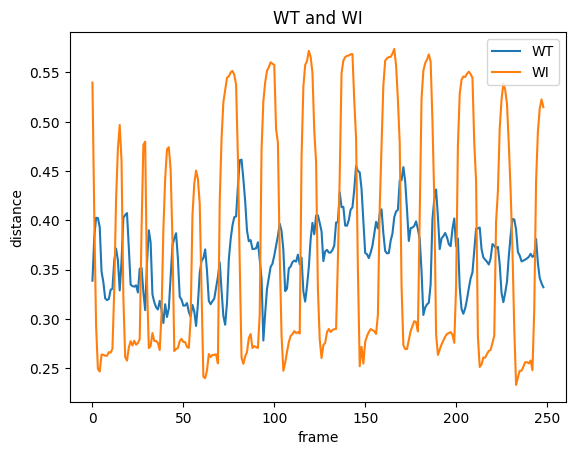

In [19]:
import matplotlib.pyplot as plt



plt.plot(WT, label="WT")
plt.plot(WI, label="WI")

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('distance')
plt.title('WT and WI')

# 显示图形
plt.show()

In [20]:
import matplotlib as mpl
print(mpl.get_cachedir())

/Users/yql/.matplotlib


In [21]:
#以下的数字代表是这个点的x坐标序号，+1 为y坐标序号 
# 0-21   index = 2 * num + 1
WRIST = 1 # 腕部关键点  
THUMB_TIP = 9 #大拇指顶点
INDEX_FINGER_TIP = 17 #食指顶点
MIDDLE_FINGER_TIP = 25 #中指顶点
RING_FINGER_TIP = 33 #无名指顶点
PINKY_TIP = 41#小指顶点

In [22]:
area_list = []
for line in label :
    x1, y1 = line[1], line[2]   #腕部关键点坐标
    x2, y2 = line[17], line[18]
    x3, y3 = line[41], line[42]
    area = 0.5 * abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    area_list.append(area)

for i in area_list :
    print(i)

0.08538398692810456
0.05375816993464052
0.038629493464052284
0.021229575163398687
0.0163562091503268
0.016531862745098033
0.016676879084967317
0.01680759803921568
0.01680759803921568
0.017777777777777778
0.017716503267973853
0.01726919934640523
0.020496323529411768
0.03694648692810458
0.07976307189542484
0.0770547385620915
0.05363970588235294
0.0477982026143791
0.020747549019607847
0.018061683006535954
0.017837009803921573
0.01817401960784314
0.017589869281045754
0.018870506535947712
0.018462009803921566
0.018678513071895417
0.01871732026143791
0.029642565359477117
0.08320669934640522
0.07617647058823529
0.055882352941176466
0.01997957516339869
0.020678104575163402
0.02271854575163399
0.021446078431372556
0.021241830065359475
0.020908905228758164
0.01982638888888889
0.02180351307189542
0.038474264705882354
0.06172589869281046
0.07543913398692811
0.07359068627450982
0.06287990196078432
0.05591299019607843
0.02529411764705881
0.019656862745098046
0.020232843137254906
0.021540032679738568

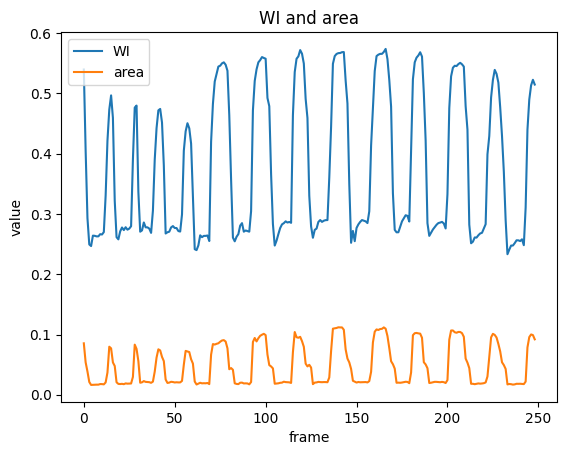

In [23]:
import matplotlib.pyplot as plt



plt.plot(WI, label="WI")
plt.plot(area_list, label="area")

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('value')
plt.title('WI and area')
 
# 显示图形
plt.show()

### 中指顶点到腕部关键点的距离

In [24]:
import math

for line in label :
    x1 = line[1]
    y1 = line[2] #腕部
    x2 = line[25]
    y2 = line[26] #食指
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    WM.append(distance)

#print(min_distance)
#print(max_distance)
#print(len(label))
print(WM)
print(len(WM))
print(max(WM))
print(min(WM))

[0.5620926907572196, 0.426758254469319, 0.2814271048504845, 0.2254680532843127, 0.20849935714535645, 0.21432658421778872, 0.2114096843503282, 0.21028656333715276, 0.20849935714535645, 0.2130549158197022, 0.21598377679989075, 0.2078763410194242, 0.2509395923570964, 0.33452569325295, 0.485992048911233, 0.5379286730148194, 0.5182420544394476, 0.34586628750007253, 0.24591714979654547, 0.21305491581970226, 0.2194879968850789, 0.21997833865531258, 0.22054181307703558, 0.22069847160811243, 0.21951451341205322, 0.2150581316760657, 0.2118772647280543, 0.2946118306546308, 0.4929394096730174, 0.5242527315777239, 0.3416029344509418, 0.2407076274311667, 0.2263728344422925, 0.23150204317239653, 0.22629232390240053, 0.22229730085045551, 0.22320243495145853, 0.20879578303295698, 0.24331859496567956, 0.33888187701130473, 0.4537921487650841, 0.515602393834134, 0.5415233103213029, 0.5175143835387233, 0.38323964275265116, 0.2599980776553309, 0.2294751253210238, 0.2266686196212917, 0.23486025722676673, 0.2

In [25]:
middle_finger_extremes, middle_finger_transitions = find_local_extremes(WM)

middle_finger_high_to_low_times, middle_finger_low_to_high_times = calculate_transition_times(middle_finger_transitions)

for idx, extreme in enumerate(middle_finger_extremes):
    index, value, extreme_type = extreme
    print(f"序号: {index}, 数值: {value}, 类型: {extreme_type}")


序号: 4, 数值: 0.20849935714535645, 类型: 最低点
序号: 5, 数值: 0.21432658421778872, 类型: 最高点
序号: 8, 数值: 0.20849935714535645, 类型: 最低点
序号: 10, 数值: 0.21598377679989075, 类型: 最高点
序号: 11, 数值: 0.2078763410194242, 类型: 最低点
序号: 15, 数值: 0.5379286730148194, 类型: 最高点
序号: 19, 数值: 0.21305491581970226, 类型: 最低点
序号: 23, 数值: 0.22069847160811243, 类型: 最高点
序号: 26, 数值: 0.2118772647280543, 类型: 最低点
序号: 29, 数值: 0.5242527315777239, 类型: 最高点
序号: 32, 数值: 0.2263728344422925, 类型: 最低点
序号: 33, 数值: 0.23150204317239653, 类型: 最高点
序号: 35, 数值: 0.22229730085045551, 类型: 最低点
序号: 36, 数值: 0.22320243495145853, 类型: 最高点
序号: 37, 数值: 0.20879578303295698, 类型: 最低点
序号: 42, 数值: 0.5415233103213029, 类型: 最高点
序号: 47, 数值: 0.2266686196212917, 类型: 最低点
序号: 48, 数值: 0.23486025722676673, 类型: 最高点
序号: 53, 数值: 0.22000728388829033, 类型: 最低点
序号: 58, 数值: 0.49450008650626265, 类型: 最高点
序号: 63, 数值: 0.20815993039853006, 类型: 最低点
序号: 67, 数值: 0.21463928146011205, 类型: 最高点
序号: 69, 数值: 0.19394488747363933, 类型: 最低点
序号: 79, 数值: 0.569890720747335, 类型: 最高点
序号: 83, 数值: 0.21345554948264

In [26]:
for i, (middle_val, index_val) in enumerate(zip(WM, WI)):
    print(f"第{i}帧, WM[{i}]: {middle_val}, WI[{i}]: {index_val}")


第0帧, WM[0]: 0.5620926907572196, WI[0]: 0.5397166666578612
第1帧, WM[1]: 0.426758254469319, WI[1]: 0.40478711042645255
第2帧, WM[2]: 0.2814271048504845, WI[2]: 0.29313183555296835
第3帧, WM[3]: 0.2254680532843127, WI[3]: 0.2494231137200879
第4帧, WM[4]: 0.20849935714535645, WI[4]: 0.24678720761110914
第5帧, WM[5]: 0.21432658421778872, WI[5]: 0.2640447039938628
第6帧, WM[6]: 0.2114096843503282, WI[6]: 0.26376238899240717
第7帧, WM[7]: 0.21028656333715276, WI[7]: 0.26286304785957826
第8帧, WM[8]: 0.20849935714535645, WI[8]: 0.26286304785957826
第9帧, WM[9]: 0.2130549158197022, WI[9]: 0.26649089506949464
第10帧, WM[10]: 0.21598377679989075, WI[10]: 0.2659380866194594
第11帧, WM[11]: 0.2078763410194242, WI[11]: 0.269959416245763
第12帧, WM[12]: 0.2509395923570964, WI[12]: 0.3305946461593172
第13帧, WM[13]: 0.33452569325295, WI[13]: 0.4215724590695813
第14帧, WM[14]: 0.485992048911233, WI[14]: 0.4731161676716032
第15帧, WM[15]: 0.5379286730148194, WI[15]: 0.4967957690439263
第16帧, WM[16]: 0.5182420544394476, WI[16]: 0.459

In [27]:
if middle_finger_high_to_low_times:
    print(f"从最高点降为最低点的时间：")
    print(f"最大时间: {max(middle_finger_high_to_low_times)}帧")
    print(f"最小时间: {min(middle_finger_high_to_low_times)}帧")
    print(f"平均时间: {sum(middle_finger_high_to_low_times) / len(middle_finger_high_to_low_times)}帧")

if middle_finger_low_to_high_times:
    print(f"从最低点升为最高点的时间：")
    print(f"最大时间: {max(middle_finger_low_to_high_times)}帧")
    print(f"最小时间: {min(middle_finger_low_to_high_times)}帧")
    print(f"平均时间: {sum(middle_finger_low_to_high_times) / len(middle_finger_low_to_high_times)}帧")

从最高点降为最低点的时间：
最大时间: 7帧
最小时间: 1帧
平均时间: 2.6842105263157894帧
从最低点升为最高点的时间：
最大时间: 10帧
最小时间: 1帧
平均时间: 3.6842105263157894帧


In [28]:
# 中指伸抓距离的变化情况
for idx, transition in enumerate(middle_finger_transitions):
    start_index, end_index, transition_type = transition
    print(f"从{start_index}秒到{end_index}秒，类型: {transition_type}")

从4秒到5秒，类型: 升为最高点
从5秒到8秒，类型: 降为最低点
从8秒到10秒，类型: 升为最高点
从10秒到11秒，类型: 降为最低点
从11秒到15秒，类型: 升为最高点
从15秒到19秒，类型: 降为最低点
从19秒到23秒，类型: 升为最高点
从23秒到26秒，类型: 降为最低点
从26秒到29秒，类型: 升为最高点
从29秒到32秒，类型: 降为最低点
从32秒到33秒，类型: 升为最高点
从33秒到35秒，类型: 降为最低点
从35秒到36秒，类型: 升为最高点
从36秒到37秒，类型: 降为最低点
从37秒到42秒，类型: 升为最高点
从42秒到47秒，类型: 降为最低点
从47秒到48秒，类型: 升为最高点
从48秒到53秒，类型: 降为最低点
从53秒到58秒，类型: 升为最高点
从58秒到63秒，类型: 降为最低点
从63秒到67秒，类型: 升为最高点
从67秒到69秒，类型: 降为最低点
从69秒到79秒，类型: 升为最高点
从79秒到83秒，类型: 降为最低点
从83秒到87秒，类型: 升为最高点
从87秒到88秒，类型: 降为最低点
从88秒到89秒，类型: 升为最高点
从89秒到90秒，类型: 降为最低点
从90秒到99秒，类型: 升为最高点
从99秒到100秒，类型: 降为最低点
从100秒到101秒，类型: 升为最高点
从101秒到107秒，类型: 降为最低点
从107秒到111秒，类型: 升为最高点
从111秒到112秒，类型: 降为最低点
从112秒到113秒，类型: 升为最高点
从113秒到114秒，类型: 降为最低点
从114秒到121秒，类型: 升为最高点
从121秒到126秒，类型: 降为最低点
从126秒到127秒，类型: 升为最高点
从127秒到128秒，类型: 降为最低点
从128秒到130秒，类型: 升为最高点
从130秒到131秒，类型: 降为最低点
从131秒到139秒，类型: 升为最高点
从139秒到141秒，类型: 降为最低点
从141秒到144秒，类型: 升为最高点
从144秒到149秒，类型: 降为最低点
从149秒到152秒，类型: 升为最高点
从152秒到153秒，类型: 降为最低点
从153秒到154秒，类型: 升为最高点
从154秒到156秒，类型: 降为最低点
从156秒到163秒，类型:

In [29]:
print(middle_cycle)

NameError: name 'middle_cycle' is not defined

In [ ]:
print(middle_finger_transitions)
print(len(middle_finger_transitions))

[(4, 5, '升为最高点'), (5, 8, '降为最低点'), (8, 10, '升为最高点'), (10, 11, '降为最低点'), (11, 15, '升为最高点'), (15, 19, '降为最低点'), (19, 23, '升为最高点'), (23, 26, '降为最低点'), (26, 29, '升为最高点'), (29, 32, '降为最低点'), (32, 33, '升为最高点'), (33, 35, '降为最低点'), (35, 36, '升为最高点'), (36, 37, '降为最低点'), (37, 42, '升为最高点'), (42, 47, '降为最低点'), (47, 48, '升为最高点'), (48, 53, '降为最低点'), (53, 58, '升为最高点'), (58, 63, '降为最低点'), (63, 67, '升为最高点'), (67, 69, '降为最低点'), (69, 79, '升为最高点'), (79, 83, '降为最低点'), (83, 87, '升为最高点'), (87, 88, '降为最低点'), (88, 89, '升为最高点'), (89, 90, '降为最低点'), (90, 99, '升为最高点'), (99, 100, '降为最低点'), (100, 101, '升为最高点'), (101, 107, '降为最低点'), (107, 111, '升为最高点'), (111, 112, '降为最低点'), (112, 113, '升为最高点'), (113, 114, '降为最低点'), (114, 121, '升为最高点'), (121, 126, '降为最低点'), (126, 127, '升为最高点'), (127, 128, '降为最低点'), (128, 130, '升为最高点'), (130, 131, '降为最低点'), (131, 139, '升为最高点'), (139, 141, '降为最低点'), (141, 144, '升为最高点'), (144, 149, '降为最低点'), (149, 152, '升为最高点'), (152, 153, '降为最低点'), (153, 154, '升为最高点'), (154, 156, '降为最低点'), (156, 163, '升

In [ ]:
print(index_finger_transitions)
print(len(index_finger_transitions))

[(4, 5, '升为最高点'), (5, 7, '降为最低点'), (8, 9, '升为最高点'), (9, 10, '降为最低点'), (10, 15, '升为最高点'), (15, 19, '降为最低点'), (19, 21, '升为最高点'), (21, 22, '降为最低点'), (22, 23, '升为最高点'), (23, 24, '降为最低点'), (24, 29, '升为最高点'), (29, 31, '降为最低点'), (31, 33, '升为最高点'), (33, 34, '降为最低点'), (34, 35, '升为最高点'), (35, 37, '降为最低点'), (37, 42, '升为最高点'), (42, 45, '降为最低点'), (45, 49, '升为最高点'), (49, 53, '降为最低点'), (53, 57, '升为最高点'), (57, 62, '降为最低点'), (62, 64, '升为最高点'), (64, 65, '降为最低点'), (65, 66, '升为最高点'), (66, 67, '降为最低点'), (67, 68, '升为最高点'), (68, 69, '降为最低点'), (69, 77, '升为最高点'), (77, 83, '降为最低点'), (83, 87, '升为最高点'), (87, 88, '降为最低点'), (88, 89, '升为最高点'), (89, 91, '降为最低点'), (91, 98, '升为最高点'), (98, 105, '降为最低点'), (105, 111, '升为最高点'), (111, 112, '降为最低点'), (112, 113, '升为最高点'), (113, 114, '降为最低点'), (114, 119, '升为最高点'), (119, 126, '降为最低点'), (126, 130, '升为最高点'), (130, 131, '降为最低点'), (131, 143, '升为最高点'), (143, 147, '降为最低点'), (147, 148, '升为最高点'), (148, 149, '降为最低点'), (149, 153, '升为最高点'), (153, 156, '降为最低点'), (156, 166, '升为最高点'), (166, 

In [ ]:
print(WM)
print(WI)

[0.5620926907572196, 0.426758254469319, 0.2814271048504845, 0.2254680532843127, 0.20849935714535645, 0.21432658421778872, 0.2114096843503282, 0.21028656333715276, 0.20849935714535645, 0.2130549158197022, 0.21598377679989075, 0.2078763410194242, 0.2509395923570964, 0.33452569325295, 0.485992048911233, 0.5379286730148194, 0.5182420544394476, 0.34586628750007253, 0.24591714979654547, 0.21305491581970226, 0.2194879968850789, 0.21997833865531258, 0.22054181307703558, 0.22069847160811243, 0.21951451341205322, 0.2150581316760657, 0.2118772647280543, 0.2946118306546308, 0.4929394096730174, 0.5242527315777239, 0.3416029344509418, 0.2407076274311667, 0.2263728344422925, 0.23150204317239653, 0.22629232390240053, 0.22229730085045551, 0.22320243495145853, 0.20879578303295698, 0.24331859496567956, 0.33888187701130473, 0.4537921487650841, 0.515602393834134, 0.5415233103213029, 0.5175143835387233, 0.38323964275265116, 0.2599980776553309, 0.2294751253210238, 0.2266686196212917, 0.23486025722676673, 0.2

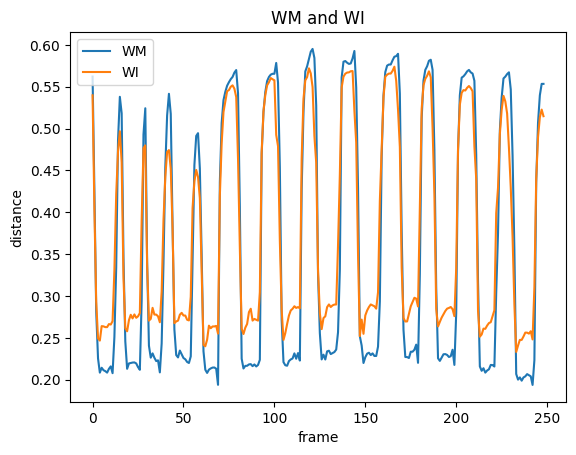

In [ ]:
import matplotlib.pyplot as plt



plt.plot(WM, label="WM")
plt.plot(WI, label="WI")

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('distance')
plt.title('WM and WI')

# 显示图形
plt.show()

middle_finger_transition 的周期数目为70个
index_finger_transition 的周期数目为65个

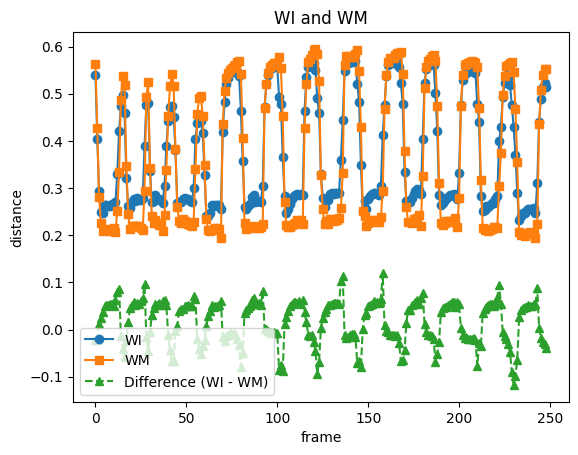

In [ ]:
import matplotlib.pyplot as plt

# 创建两个示例列表
#WI = [1, 2, 3, 4, 5]
#WM = [5, 4, 3, 2, 1]

difference = [wi - wm for wi, wm in zip(WI, WM)]
# 绘制曲线
plt.plot(WI, label='WI', marker='o')  # 绘制WT列表的曲线，使用圆点标记
plt.plot(WM, label='WM', marker='s')  # 绘制WM列表的曲线，使用正方形标记
plt.plot(difference, label='Difference (WI - WM)', linestyle='--', marker='^')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('WI and WM')
plt.xlabel('frame')
plt.ylabel('distance')

# 显示图形
plt.show()

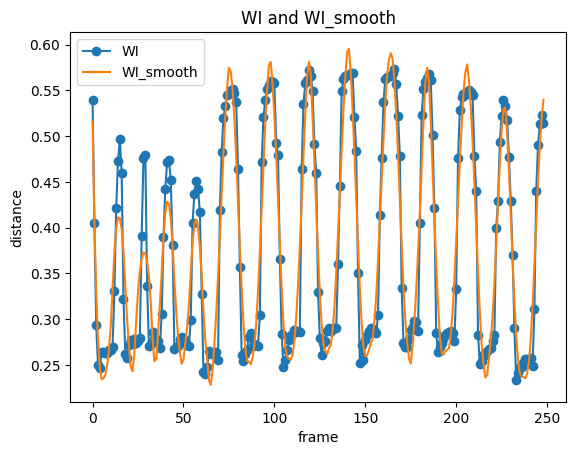

In [35]:
import matplotlib.pyplot as plt
import scipy
# 创建两个示例列表
#WI = [1, 2, 3, 4, 5]
#WM = [5, 4, 3, 2, 1]

#tmp = [wi - wm for wi, wm in zip(WI, WM)]

#tmp_smooth = scipy.signal.savgol_filter(tmp,11,3)

WI_smooth = scipy.signal.savgol_filter(WI,13,3)

# 绘制曲线
plt.plot(WI, label='WI', marker='o')  # 绘制WT列表的曲线，使用圆点标记
#plt.plot(WM, label='WM', marker='s')  # 绘制WM列表的曲线，使用正方形标记
#plt.plot(tmp, label='tmp(WI - WM)', linestyle='--', marker='^')
#plt.plot(tmp_smooth, label='tmp_smooth', marker='.')
plt.plot(WI_smooth, label='WI_smooth')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('WI and WI_smooth')
plt.xlabel('frame')
plt.ylabel('distance')

# 显示图形
plt.show()

In [48]:
print(WP)

[]


In [49]:
print(WI)

[0.5397166666578612, 0.40478711042645255, 0.29313183555296835, 0.2494231137200879, 0.24678720761110914, 0.2640447039938628, 0.26376238899240717, 0.26286304785957826, 0.26286304785957826, 0.26649089506949464, 0.2659380866194594, 0.269959416245763, 0.3305946461593172, 0.4215724590695813, 0.4731161676716032, 0.4967957690439263, 0.4596194077712559, 0.32190363613825934, 0.261529038447388, 0.25789770126046924, 0.27113692947509505, 0.27759124840644617, 0.2732770718190108, 0.2780041849327169, 0.2739814593389758, 0.27576108569765784, 0.2796993322012947, 0.39026538671306643, 0.4765495353156394, 0.4798726682962656, 0.33665159215740326, 0.27061137258599033, 0.272711243472291, 0.2858964473186601, 0.2778378443322214, 0.2778378443322214, 0.2757610856976579, 0.268642210128394, 0.30546576045922913, 0.3901832827627935, 0.4423831536929049, 0.47201269748424746, 0.47428493677048555, 0.45176272485797797, 0.38057944370872504, 0.2675909906398287, 0.2696635414837096, 0.27061137258599033, 0.2776920763604112, 0.

In [47]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=(20, 10))

WI_smooth = scipy.signal.savgol_filter(WI,15,3)
WM_smooth = scipy.signal.savgol_filter(WM,15,3)
WP_smooth = scipy.signal.savgol_filter(WP,15,3)
#plt.plot(WT, label="WT")
#plt.plot(WI, label="WI")
plt.plot(WI_smooth,label="WI_smooth")
#plt.plot(WM, label="WM")
plt.plot(WM_smooth, label="WM_smooth")
#plt.plot(WR, label="WR")
#plt.plot(WR_smooth, label="WR_smooth")
#plt.plot(WP, label="WP")
plt.plot(WP_smooth, label="WP_smooth")
# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('distance')
plt.title('2-5 finger-wrist distance')

#x_major_locator=MultipleLocator(50)
#把x轴的刻度间隔设置为50，并存在变量里
#y_major_locator=MultipleLocator(0.1)
#把y轴的刻度间隔设置为0.1，并存在变量里
#ax=plt.gca()
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)

#ax.yaxis.set_major_locator(y_major_locator)

plt.show()

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

<Figure size 2000x1000 with 0 Axes>

In [ ]:
for j, hand_landmarks in enumerate(results.multi_hand_landmarks):
                    if j == self.hand_index.get():  # 只要选中的手的数据
                        self.exist[i - 1] = True
                        self.keypoint_data[i - 1][1] = round(
                            hand_landmarks.landmark[0].x, 3)
                        self.keypoint_data[i - 1][2] = round(
                            hand_landmarks.landmark[0].y, 3)
                        self.keypoint_data[i - 1][3] = round(
                            hand_landmarks.landmark[1].x, 3)
                        self.keypoint_data[i - 1][4] = round(
                            hand_landmarks.landmark[1].y, 3)
                        self.keypoint_data[i - 1][5] = round(
                            hand_landmarks.landmark[2].x, 3)
                        self.keypoint_data[i - 1][6] = round(
                            hand_landmarks.landmark[2].y, 3)
                        self.keypoint_data[i - 1][7] = round(
                            hand_landmarks.landmark[3].x, 3)
                        self.keypoint_data[i - 1][8] = round(
                            hand_landmarks.landmark[3].y, 3)
                        self.keypoint_data[i - 1][9] = round(
                            hand_landmarks.landmark[4].x, 3)
                        self.keypoint_data[i - 1][10] = round(
                            hand_landmarks.landmark[4].y, 3)
                        self.keypoint_data[i - 1][11] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x, 3)
                        self.keypoint_data[i - 1][12] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y, 3)
                        self.keypoint_data[i - 1][13] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x, 3)
                        self.keypoint_data[i - 1][14] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y, 3)
                        self.keypoint_data[i - 1][15] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x, 3)
                        self.keypoint_data[i - 1][16] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y, 3)
                        self.keypoint_data[i - 1][17] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x, 3)
                        self.keypoint_data[i - 1][18] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y, 3)
                        self.keypoint_data[i - 1][19] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x, 3)
                        self.keypoint_data[i - 1][20] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y, 3)
                        self.keypoint_data[i - 1][21] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x, 3)
                        self.keypoint_data[i - 1][22] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y, 3)
                        self.keypoint_data[i - 1][23] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x, 3)
                        self.keypoint_data[i - 1][24] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y, 3)
                        self.keypoint_data[i - 1][25] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x, 3)
                        self.keypoint_data[i - 1][26] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y, 3)
                        self.keypoint_data[i - 1][27] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x, 3)
                        self.keypoint_data[i - 1][28] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y, 3)
                        self.keypoint_data[i - 1][29] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x, 3)
                        self.keypoint_data[i - 1][30] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y, 3)
                        self.keypoint_data[i - 1][31] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x, 3)
                        self.keypoint_data[i - 1][32] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y, 3)
                        self.keypoint_data[i - 1][33] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x, 3)
                        self.keypoint_data[i - 1][34] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y, 3)
                        self.keypoint_data[i - 1][35] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x, 3)
                        self.keypoint_data[i - 1][36] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y, 3)
                        self.keypoint_data[i - 1][37] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x, 3)
                        self.keypoint_data[i - 1][38] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y, 3)
                        self.keypoint_data[i - 1][39] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x, 3)
                        self.keypoint_data[i - 1][40] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y, 3)
                        self.keypoint_data[i - 1][41] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x, 3)
                        self.keypoint_data[i - 1][42] = round(
                            hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y, 3)

NameError: name 'results' is not defined

In [4]:
import os
import json
import math
import numpy as np
# 以下的数字代表是这个点的x坐标序号，+1 为y坐标序号 
# 0-21   index = 2 * num + 1
WRIST = 1 # 腕部关键点  
THUMB_TIP = 9 #大拇指顶点
INDEX_FINGER_TIP = 17 #食指顶点
MIDDLE_FINGER_TIP = 25 #中指顶点
RING_FINGER_TIP = 33 #无名指顶点
PINKY_TIP = 41 #小指顶点

'''
WT  大拇指 ——> 腕部
WI  食指
WM  中指
WR  无名指
WP  小指
'''

# 计算最大值和最小值
def find_local_extremes(numbers):
    if len(numbers) < 3:
        return "输入的数字串过短，无法找到局部最大值和最小值", []

    extremes = []
    transitions = []  # 记录时间变化点

    for i in range(1, len(numbers) - 1):
        if numbers[i] >= numbers[i - 1] and numbers[i] >= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最高点"))
        elif numbers[i] <= numbers[i - 1] and numbers[i] <= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最低点"))
        # elif numbers[i - 1] == numbers[i + 1]:
        #     print("重复")
    
    if len(extremes) == 0:
        return "没有找到局部最大值和最小值", []

    # 记录时间变化点
    for i in range(1, len(extremes)):
        if extremes[i][2] == "最高点" and extremes[i-1][2] == "最低点":
            transitions.append((extremes[i-1][0], extremes[i][0], "升为最高点"))
        elif extremes[i][2] == "最低点" and extremes[i-1][2] == "最高点":
            transitions.append((extremes[i-1][0], extremes[i][0], "降为最低点"))

    return extremes, transitions

# 计算抓伸周期
def calculate_transition_times(transitions):
    high_to_low_times = []
    low_to_high_times = []

    for i in range(1, len(transitions)):
        if transitions[i][2] == "降为最低点":
            high_to_low_time = transitions[i][1] - transitions[i][0]
            high_to_low_times.append(high_to_low_time)
        elif transitions[i][2] == "升为最高点":
            low_to_high_time = transitions[i][1] - transitions[i][0]
            low_to_high_times.append(low_to_high_time)

    return high_to_low_times, low_to_high_times

# 计算2、3、4、5指相对于腕部关键点的距离
def get_distance(label):
    WT = []
    WI = []
    WM = []
    WR = []
    WP = []
    for line in label:
        x1, y1 = line[1], line[2]
        coordinates = [(line[i], line[i + 1]) for i in range(9, 42, 8)]

        distances = [math.sqrt((x - x1) ** 2 + (y - y1) ** 2) for x, y in coordinates]

        wt_distance, wi_distance, wm_distance, wr_distance, wp_distance = distances

        WT.append(wt_distance)
        WI.append(wi_distance)
        WM.append(wm_distance)
        WR.append(wr_distance)
        WP.append(wp_distance)

    return WT, WI, WM, WR, WP

def get_info(dist):
    extremes, transitions = find_local_extremes(dist)
    high_to_low_times, low_to_high_times = calculate_transition_times(transitions)
    return extremes, transitions, high_to_low_times, low_to_high_times

def process(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
        label = data["label"]
        
    WT, WI, WM, WR, WP = get_distance(label)
    
    wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times = get_info(WT)
    wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times = get_info(WI)
    wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times = get_info(WM)
    wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times = get_info(WR)
    wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times = get_info(WP)
    
    # single = [[wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times],
    #           [wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times],
    #           [wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times],
    #           [wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times],
    #           [wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times]]
    
    # wt_info = ['WT', max(wt_high_to_low_times), min(wt_high_to_low_times), sum(wt_high_to_low_times) / len(wt_high_to_low_times), max(wt_low_to_high_times), min(wt_low_to_high_times),sum(wt_low_to_high_times) / len(wt_low_to_high_times)]
    # wi_info = ['WI', max(wi_high_to_low_times), min(wi_high_to_low_times), sum(wi_high_to_low_times) / len(wi_high_to_low_times), max(wi_low_to_high_times), min(wi_low_to_high_times),sum(wi_low_to_high_times) / len(wi_low_to_high_times)]
    # wm_info = ['WM', max(wm_high_to_low_times), min(wm_high_to_low_times), sum(wm_high_to_low_times) / len(wm_high_to_low_times), max(wm_low_to_high_times), min(wm_low_to_high_times),sum(wm_low_to_high_times) / len(wm_low_to_high_times)]
    # wr_info = ['WR', max(wr_high_to_low_times), min(wr_high_to_low_times), sum(wr_high_to_low_times) / len(wr_high_to_low_times), max(wr_low_to_high_times), min(wr_low_to_high_times),sum(wr_low_to_high_times) / len(wr_low_to_high_times)]
    # wp_info = ['WP', max(wp_high_to_low_times), min(wp_high_to_low_times), sum(wp_high_to_low_times) / len(wp_high_to_low_times), max(wp_low_to_high_times), min(wp_low_to_high_times),sum(wp_low_to_high_times) / len(wp_low_to_high_times)]

    
    wt_info = [max(wt_high_to_low_times), min(wt_high_to_low_times), sum(wt_high_to_low_times) / len(wt_high_to_low_times), max(wt_low_to_high_times), min(wt_low_to_high_times),sum(wt_low_to_high_times) / len(wt_low_to_high_times)]
    wi_info = [max(wi_high_to_low_times), min(wi_high_to_low_times), sum(wi_high_to_low_times) / len(wi_high_to_low_times), max(wi_low_to_high_times), min(wi_low_to_high_times),sum(wi_low_to_high_times) / len(wi_low_to_high_times)]
    wm_info = [max(wm_high_to_low_times), min(wm_high_to_low_times), sum(wm_high_to_low_times) / len(wm_high_to_low_times), max(wm_low_to_high_times), min(wm_low_to_high_times),sum(wm_low_to_high_times) / len(wm_low_to_high_times)]
    wr_info = [max(wr_high_to_low_times), min(wr_high_to_low_times), sum(wr_high_to_low_times) / len(wr_high_to_low_times), max(wr_low_to_high_times), min(wr_low_to_high_times),sum(wr_low_to_high_times) / len(wr_low_to_high_times)]
    wp_info = [max(wp_high_to_low_times), min(wp_high_to_low_times), sum(wp_high_to_low_times) / len(wp_high_to_low_times), max(wp_low_to_high_times), min(wp_low_to_high_times),sum(wp_low_to_high_times) / len(wp_low_to_high_times)]

    
    return [wt_info, wi_info, wm_info, wr_info, wp_info]

# 定义文件路径
label_folder = 'mask_output/all'  # label文件夹路径
txt_file = 'mask_output/jinzhuibing.txt'  # jinzhuibing.txt文件路径

# 读取txt文件中的序号名
with open(txt_file, 'r') as file:
    sequence_numbers = file.read().splitlines()

result = []

# 遍历label文件夹中的文件
for seq_num in sequence_numbers:
    json_file = f'p{seq_num}L.json'
    json_path = os.path.join(label_folder, json_file)
    
    # 检查文件是否存在
    if os.path.exists(json_path):
        single = process(json_path)
        #print(single)
        result.append(single)
    # else:
    #     print(f'File {json_file} does not exist in the label folder.')

#print(result)

# # 打印 result 的整体形状
# print(f"Result has {len(result)} elements.")

# # 遍历 result 打印每个单独元素的形状
# for i, single in enumerate(result):
#     print(f"\nElement {i} has {len(single)} sub-elements:")
#     for j, sub_list in enumerate(single):
#         print(f"  Sub-element {j} has {len(sub_list)} items:")
#         if isinstance(sub_list, list):
#             for k, sub_sub_list in enumerate(sub_list):
#                 if isinstance(sub_sub_list, list):
#                     print(f"    Sub-sub-element {k} has {len(sub_sub_list)} items.")

# 将 result 中的所有 single 列表转换为 numpy 数组
result_array = np.array(result)

# 计算 result 中所有 single 列表的平均值
average_single = np.mean(result_array, axis=0)

# 打印结果
print("Average values in the same shape as 'single':")
print(average_single)

# # 以相同的形状存储结果
# average_single_list = average_single.tolist()

# # 打印结果
# print("Average values stored in the same shape as 'single':")
# print(average_single_list)



Average values in the same shape as 'single':
[[8.50387597 1.06976744 3.53450409 8.07751938 1.03100775 3.45798184]
 [8.01550388 1.05426357 3.32376842 8.42635659 1.03100775 3.4254325 ]
 [8.46511628 1.03100775 3.58521378 8.30232558 1.04651163 3.41657793]
 [8.8372093  1.07751938 3.84276907 7.89147287 1.06976744 3.32792643]
 [8.7751938  1.03100775 3.54361996 7.5503876  1.00775194 2.99235842]]


In [9]:
import os
import json
import math
import numpy as np
# 以下的数字代表是这个点的x坐标序号，+1 为y坐标序号 
# 0-21   index = 2 * num + 1
WRIST = 1 # 腕部关键点  
THUMB_TIP = 9 #大拇指顶点
INDEX_FINGER_TIP = 17 #食指顶点
MIDDLE_FINGER_TIP = 25 #中指顶点
RING_FINGER_TIP = 33 #无名指顶点
PINKY_TIP = 41 #小指顶点

'''
WT  大拇指 ——> 腕部
WI  食指
WM  中指
WR  无名指
WP  小指
'''

# 计算最大值和最小值
def find_local_extremes(numbers):
    if len(numbers) < 3:
        return "输入的数字串过短，无法找到局部最大值和最小值", []

    extremes = []
    transitions = []  # 记录时间变化点

    for i in range(1, len(numbers) - 1):
        if numbers[i] >= numbers[i - 1] and numbers[i] >= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最高点"))
        elif numbers[i] <= numbers[i - 1] and numbers[i] <= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最低点"))
        # elif numbers[i - 1] == numbers[i + 1]:
        #     print("重复")
    
    if len(extremes) == 0:
        return "没有找到局部最大值和最小值", []

    # 记录时间变化点
    for i in range(1, len(extremes)):
        if extremes[i][2] == "最高点" and extremes[i-1][2] == "最低点":
            transitions.append((extremes[i-1][0], extremes[i][0], "升为最高点"))
        elif extremes[i][2] == "最低点" and extremes[i-1][2] == "最高点":
            transitions.append((extremes[i-1][0], extremes[i][0], "降为最低点"))

    return extremes, transitions

# 计算抓伸周期
def calculate_transition_times(transitions):
    high_to_low_times = []
    low_to_high_times = []

    for i in range(1, len(transitions)):
        if transitions[i][2] == "降为最低点":
            high_to_low_time = transitions[i][1] - transitions[i][0]
            high_to_low_times.append(high_to_low_time)
        elif transitions[i][2] == "升为最高点":
            low_to_high_time = transitions[i][1] - transitions[i][0]
            low_to_high_times.append(low_to_high_time)

    return high_to_low_times, low_to_high_times

# 计算2、3、4、5指相对于腕部关键点的距离
def get_distance(label):
    WT = []
    WI = []
    WM = []
    WR = []
    WP = []
    for line in label:
        x1, y1 = line[1], line[2]
        coordinates = [(line[i], line[i + 1]) for i in range(9, 42, 8)]

        distances = [math.sqrt((x - x1) ** 2 + (y - y1) ** 2) for x, y in coordinates]

        wt_distance, wi_distance, wm_distance, wr_distance, wp_distance = distances

        WT.append(wt_distance)
        WI.append(wi_distance)
        WM.append(wm_distance)
        WR.append(wr_distance)
        WP.append(wp_distance)

    return WT, WI, WM, WR, WP

def get_info(dist):
    extremes, transitions = find_local_extremes(dist)
    high_to_low_times, low_to_high_times = calculate_transition_times(transitions)
    return extremes, transitions, high_to_low_times, low_to_high_times

def process(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
        label = data["label"]
        
    WT, WI, WM, WR, WP = get_distance(label)
    
    wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times = get_info(WT)
    wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times = get_info(WI)
    wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times = get_info(WM)
    wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times = get_info(WR)
    wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times = get_info(WP)
    
    # single = [[wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times],
    #           [wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times],
    #           [wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times],
    #           [wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times],
    #           [wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times]]
    
    # wt_info = ['WT', max(wt_high_to_low_times), min(wt_high_to_low_times), sum(wt_high_to_low_times) / len(wt_high_to_low_times), max(wt_low_to_high_times), min(wt_low_to_high_times),sum(wt_low_to_high_times) / len(wt_low_to_high_times)]
    # wi_info = ['WI', max(wi_high_to_low_times), min(wi_high_to_low_times), sum(wi_high_to_low_times) / len(wi_high_to_low_times), max(wi_low_to_high_times), min(wi_low_to_high_times),sum(wi_low_to_high_times) / len(wi_low_to_high_times)]
    # wm_info = ['WM', max(wm_high_to_low_times), min(wm_high_to_low_times), sum(wm_high_to_low_times) / len(wm_high_to_low_times), max(wm_low_to_high_times), min(wm_low_to_high_times),sum(wm_low_to_high_times) / len(wm_low_to_high_times)]
    # wr_info = ['WR', max(wr_high_to_low_times), min(wr_high_to_low_times), sum(wr_high_to_low_times) / len(wr_high_to_low_times), max(wr_low_to_high_times), min(wr_low_to_high_times),sum(wr_low_to_high_times) / len(wr_low_to_high_times)]
    # wp_info = ['WP', max(wp_high_to_low_times), min(wp_high_to_low_times), sum(wp_high_to_low_times) / len(wp_high_to_low_times), max(wp_low_to_high_times), min(wp_low_to_high_times),sum(wp_low_to_high_times) / len(wp_low_to_high_times)]

    
    wt_info = [max(wt_high_to_low_times), min(wt_high_to_low_times), sum(wt_high_to_low_times) / len(wt_high_to_low_times), max(wt_low_to_high_times), min(wt_low_to_high_times),sum(wt_low_to_high_times) / len(wt_low_to_high_times)]
    wi_info = [max(wi_high_to_low_times), min(wi_high_to_low_times), sum(wi_high_to_low_times) / len(wi_high_to_low_times), max(wi_low_to_high_times), min(wi_low_to_high_times),sum(wi_low_to_high_times) / len(wi_low_to_high_times)]
    wm_info = [max(wm_high_to_low_times), min(wm_high_to_low_times), sum(wm_high_to_low_times) / len(wm_high_to_low_times), max(wm_low_to_high_times), min(wm_low_to_high_times),sum(wm_low_to_high_times) / len(wm_low_to_high_times)]
    wr_info = [max(wr_high_to_low_times), min(wr_high_to_low_times), sum(wr_high_to_low_times) / len(wr_high_to_low_times), max(wr_low_to_high_times), min(wr_low_to_high_times),sum(wr_low_to_high_times) / len(wr_low_to_high_times)]
    wp_info = [max(wp_high_to_low_times), min(wp_high_to_low_times), sum(wp_high_to_low_times) / len(wp_high_to_low_times), max(wp_low_to_high_times), min(wp_low_to_high_times),sum(wp_low_to_high_times) / len(wp_low_to_high_times)]

    
    return [wt_info, wi_info, wm_info, wr_info, wp_info]

# 定义文件路径
label_folder = 'mask_output/all'  # label文件夹路径
txt_file = 'mask_output/pajinseng.txt'  # jinzhuibing.txt文件路径

# 读取txt文件中的序号名
with open(txt_file, 'r') as file:
    sequence_numbers = file.read().splitlines()

result = []

# 遍历label文件夹中的文件
for seq_num in sequence_numbers:
    json_file = f'p{seq_num}L.json'
    json_path = os.path.join(label_folder, json_file)
    
    # 检查文件是否存在
    if os.path.exists(json_path):
        #print(json_path)
        single = process(json_path)
        #print(single)
        result.append(single)
    # else:
    #     print(f'File {json_file} does not exist in the label folder.')

# print(result)

# # 打印 result 的整体形状
# print(f"Result has {len(result)} elements.")

# # 遍历 result 打印每个单独元素的形状
# for i, single in enumerate(result):
#     print(f"\nElement {i} has {len(single)} sub-elements:")
#     for j, sub_list in enumerate(single):
#         print(f"  Sub-element {j} has {len(sub_list)} items:")
#         if isinstance(sub_list, list):
#             for k, sub_sub_list in enumerate(sub_list):
#                 if isinstance(sub_sub_list, list):
#                     print(f"    Sub-sub-element {k} has {len(sub_sub_list)} items.")

# 将 result 中的所有 single 列表转换为 numpy 数组
result_array = np.array(result)

# 计算 result 中所有 single 列表的平均值
average_single = np.mean(result_array, axis=0)

#打印结果
print("Average values in the same shape as 'single':")
print(average_single)

# # 以相同的形状存储结果
# average_single_list = average_single.tolist()

# # 打印结果
# print("Average values stored in the same shape as 'single':")
# print(average_single_list)



Average values in the same shape as 'single':
[[ 9.08108108  1.          3.15801174  9.27027027  1.          2.89189324]
 [ 9.97297297  1.10810811  3.24692038  9.64864865  1.08108108  3.18267176]
 [10.43243243  1.02702703  3.69000894  9.94594595  1.          3.45642252]
 [10.51351351  1.          3.89530588  9.75675676  1.          3.51515374]
 [ 9.89189189  1.          3.33256969  9.18918919  1.          3.04122396]]


In [ ]:
import os
import json
import math
import numpy as np
# 以下的数字代表是这个点的x坐标序号，+1 为y坐标序号 
# 0-21   index = 2 * num + 1
WRIST = 1 # 腕部关键点  
THUMB_TIP = 9 #大拇指顶点
INDEX_FINGER_TIP = 17 #食指顶点
MIDDLE_FINGER_TIP = 25 #中指顶点
RING_FINGER_TIP = 33 #无名指顶点
PINKY_TIP = 41 #小指顶点

'''
WT  大拇指 ——> 腕部
WI  食指
WM  中指
WR  无名指
WP  小指
'''

# 计算最大值和最小值
def find_local_extremes(numbers):
    if len(numbers) < 3:
        return "输入的数字串过短，无法找到局部最大值和最小值", []

    extremes = []
    transitions = []  # 记录时间变化点

    for i in range(1, len(numbers) - 1):
        if numbers[i] >= numbers[i - 1] and numbers[i] > numbers[i + 1] :
            extremes.append((i, numbers[i], "最高点"))
        elif numbers[i] <= numbers[i - 1] and numbers[i] < numbers[i + 1]:
            extremes.append((i, numbers[i], "最低点"))
    
    if len(extremes) == 0:
        return "没有找到局部最大值和最小值", []

    # 记录时间变化点
    for i in range(1, len(extremes)):
        if extremes[i][2] == "最高点" and extremes[i-1][2] == "最低点":
            transitions.append((extremes[i-1][0], extremes[i][0], "升为最高点"))
        elif extremes[i][2] == "最低点" and extremes[i-1][2] == "最高点":
            transitions.append((extremes[i-1][0], extremes[i][0], "降为最低点"))

    return extremes, transitions

# 计算抓伸周期
def calculate_transition_times(transitions):
    high_to_low_times = []
    low_to_high_times = []

    for i in range(1, len(transitions)):
        if transitions[i][2] == "降为最低点":
            high_to_low_time = transitions[i][1] - transitions[i][0]
            high_to_low_times.append(high_to_low_time)
        elif transitions[i][2] == "升为最高点":
            low_to_high_time = transitions[i][1] - transitions[i][0]
            low_to_high_times.append(low_to_high_time)

    return high_to_low_times, low_to_high_times

# 计算2、3、4、5指相对于腕部关键点的距离
def get_distance(label):
    WT = []
    WI = []
    WM = []
    WR = []
    WP = []
    for line in label:
        x1, y1 = line[1], line[2]
        coordinates = [(line[i], line[i + 1]) for i in range(9, 42, 8)]

        distances = [math.sqrt((x - x1) ** 2 + (y - y1) ** 2) for x, y in coordinates]

        wt_distance, wi_distance, wm_distance, wr_distance, wp_distance = distances

        WT.append(wt_distance)
        WI.append(wi_distance)
        WM.append(wm_distance)
        WR.append(wr_distance)
        WP.append(wp_distance)

    return WT, WI, WM, WR, WP

def get_info(dist):
    extremes, transitions = find_local_extremes(dist)
    high_to_low_times, low_to_high_times = calculate_transition_times(transitions)
    return extremes, transitions, high_to_low_times, low_to_high_times

def process(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
        label = data["label"]
        
    WT, WI, WM, WR, WP = get_distance(label)
    
    wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times = get_info(WT)
    wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times = get_info(WI)
    wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times = get_info(WM)
    wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times = get_info(WR)
    wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times = get_info(WP)
    
    
    wt_info = [max(wt_high_to_low_times), min(wt_high_to_low_times), sum(wt_high_to_low_times) / len(wt_high_to_low_times), max(wt_low_to_high_times), min(wt_low_to_high_times),sum(wt_low_to_high_times) / len(wt_low_to_high_times)]
    wi_info = [max(wi_high_to_low_times), min(wi_high_to_low_times), sum(wi_high_to_low_times) / len(wi_high_to_low_times), max(wi_low_to_high_times), min(wi_low_to_high_times),sum(wi_low_to_high_times) / len(wi_low_to_high_times)]
    wm_info = [max(wm_high_to_low_times), min(wm_high_to_low_times), sum(wm_high_to_low_times) / len(wm_high_to_low_times), max(wm_low_to_high_times), min(wm_low_to_high_times),sum(wm_low_to_high_times) / len(wm_low_to_high_times)]
    wr_info = [max(wr_high_to_low_times), min(wr_high_to_low_times), sum(wr_high_to_low_times) / len(wr_high_to_low_times), max(wr_low_to_high_times), min(wr_low_to_high_times),sum(wr_low_to_high_times) / len(wr_low_to_high_times)]
    wp_info = [max(wp_high_to_low_times), min(wp_high_to_low_times), sum(wp_high_to_low_times) / len(wp_high_to_low_times), max(wp_low_to_high_times), min(wp_low_to_high_times),sum(wp_low_to_high_times) / len(wp_low_to_high_times)]

    
    #return [wt_info, wi_info, wm_info, wr_info, wp_info]
    return [wi_info, wm_info, wr_info, wp_info]
    #return [wi_info, wm_info, wr_info]


In [124]:
def get_result(label_folder, txt_file):
    # 读取txt文件中的序号名
    with open(txt_file, 'r') as file:
        sequence_numbers = file.read().splitlines()
    result = []
    # 遍历label文件夹中的文件
    for seq_num in sequence_numbers:
        json_file = f'p{seq_num}L.json'
        json_path = os.path.join(label_folder, json_file)
        
        # 检查文件是否存在
        if os.path.exists(json_path):
            single = process(json_path)
            #print(single)
            result.append(single)
        # else:
        #     print(f'File {json_file} does not exist in the label folder.')
    return np.array(result)


In [125]:
# 定义文件路径
label_folder = 'mask_output/all'  # label文件夹路径
#txt_file = 'mask_output/jinzhuibing.txt'  # jinzhuibing.txt文件路径

jzb_data = get_result(label_folder, 'mask_output/jinzhuibing.txt')
pjs_data = get_result(label_folder, 'mask_output/pajinseng.txt')
yz_data = get_result(label_folder, 'mask_output/yaozhui.txt')
zf_data = get_result(label_folder, 'mask_output/zhongfeng.txt')
print(jzb_data.shape)
print(pjs_data.shape)
#print(yz_data.shape)
print(zf_data.shape)

(129, 4, 6)
(37, 4, 6)
(106, 4, 6)


In [126]:
jzb_index = np.random.choice(jzb_data.shape[0], 37, replace=False)
jzb_data = jzb_data[jzb_index]
# pjs_index = np.random.choice(pjs_data.shape[0], 10, replace=False) 
# pjs_data = pjs_data[pjs_index]
zf_index = np.random.choice(zf_data.shape[0], 37, replace=False)
zf_data = zf_data[zf_index]

In [127]:
print(jzb_data.shape)
print(pjs_data.shape)
#print(yz_data.shape)
print(zf_data.shape)

(37, 4, 6)
(37, 4, 6)
(37, 4, 6)


In [128]:
# 展开数据列表
x1 = jzb_data.reshape((jzb_data.shape[0], -1))
x2 = pjs_data.reshape((pjs_data.shape[0], -1))
#x3 = yz_data.reshape((yz_data.shape[0], -1))
x4 = zf_data.reshape((zf_data.shape[0], -1))

# 创建对应的标签
y1 = np.ones(x1.shape[0], dtype=int)
y2 = np.ones(x2.shape[0], dtype=int) * 2
#y3 = np.ones(x3.shape[0], dtype=int) * 3
y4 = np.ones(x4.shape[0], dtype=int) * 4


# 合并数据和标签
X = np.vstack((x1, x2, x4))
y = np.hstack((y1, y2, y4))

# 打印合并后的数据和标签的形状
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (111, 24)
Shape of y: (111,)


In [129]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 创建SVM分类器
# clf = svm.SVC(kernel='linear')  # 使用线性核函数

# # 训练模型
# clf.fit(X_train, y_train)

# # 预测
# y_pred = clf.predict(X_test)

In [130]:
# # 评估模型
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # 输出预测结果
# print("Predicted labels:", y_pred)
# print("Actual labels:   ", y_test)

In [131]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义要评估的模型
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 使用交叉验证评估每个模型的性能
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# 选择性能最好的模型进行训练和测试
best_model = SVC()
best_model.fit(X_train, y_train)
accuracy = best_model.score(X_test, y_test)
print(f"Best Model Test Accuracy: {accuracy:.2f}")

SVM - Accuracy: 0.48 (+/- 0.15)
Random Forest - Accuracy: 0.45 (+/- 0.21)
Logistic Regression - Accuracy: 0.41 (+/- 0.24)
K-Nearest Neighbors - Accuracy: 0.40 (+/- 0.19)
Best Model Test Accuracy: 0.52


/Users/yql/miniconda3/envs/long/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yql/miniconda3/envs/long/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.